In [1]:
#import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn 

In [2]:
#load datasets
train_data = pd.read_csv("train.csv")
store_data = pd.read_csv("store.csv")

C:\Users\pragy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#shape of th datadrames
print("Shape of train data:", train_data.shape,
      "\nShape of store data:",store_data.shape)

Shape of train data: (1017209, 9) 
Shape of store data: (1115, 10)


In [4]:
train_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


# Train data Cleaning

In [6]:
#check null values
print("Train data:\n",train_data.isnull().sum())

Train data:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [7]:
#check duplicate values
print("Train data:\n",train_data.duplicated().sum())

Train data:
 0


In [8]:
train_data['Date']= pd.to_datetime(train_data['Date'])

In [9]:
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month

# Train data Analysis

In [10]:
train_data[train_data['Sales'] == train_data['Sales'].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
44393,909,1,2015-06-22,41551,1721,1,0,0,0,2015,6


In [11]:
train_data[train_data['Sales'] == 0].count()[0]

172871

In [12]:
openstore_sales = (train_data[(train_data.Open == 1) & (train_data.Sales)])
openstore_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

<AxesSubplot:ylabel='Sales'>

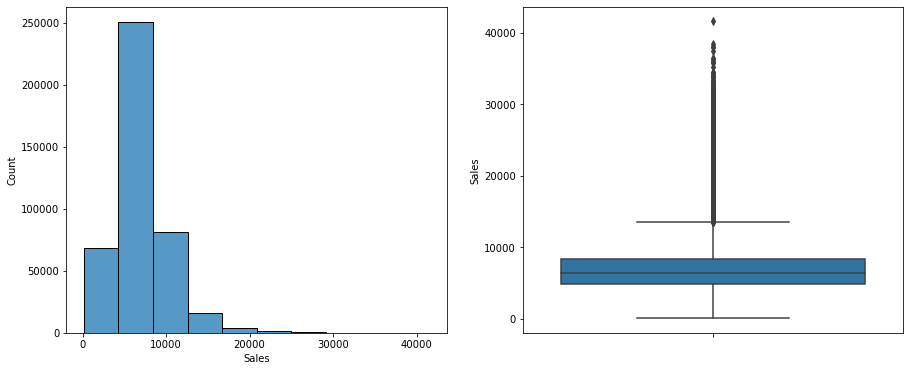

In [13]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))

sns.histplot(data= openstore_sales, x = 'Sales', bins = 10, ax = axis1)
sns.boxplot(data= openstore_sales, y = 'Sales',  ax = axis2)

In [14]:
print("Rossmann has", round(openstore_sales.Sales[(openstore_sales.Sales > 10000)].count() / openstore_sales.shape[0] * 100, 2), 
      "% of the time sales over 10,000 Euros")
print("Rossmann has", round(openstore_sales.Sales[(openstore_sales.Sales < 1000)].count() / openstore_sales.shape[0] * 100, 4), 
      "% of the time sales under 1000 Euros")

Rossmann has 13.45 % of the time sales over 10,000 Euros
Rossmann has 0.0277 % of the time sales under 1000 Euros


In [15]:
train_data[train_data.Customers == train_data.Customers.max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
993496,817,2,2013-01-22,27190,7388,1,1,0,0,2013,1


<AxesSubplot:ylabel='Customers'>

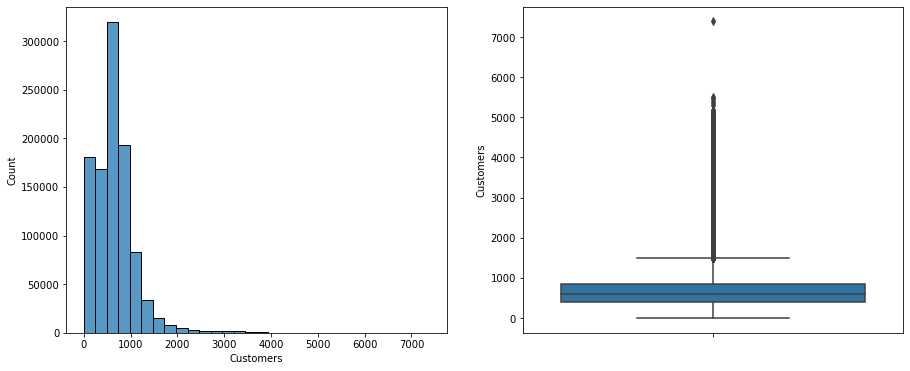

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='Customers', data=train_data, bins=30, ax= axis1)
sns.boxplot(data= train_data, y = 'Customers',  ax = axis2)

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

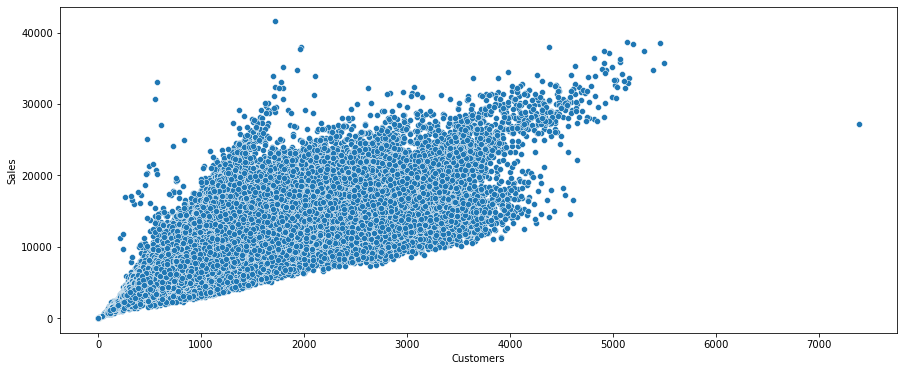

In [17]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_data, x='Customers', y='Sales')

In [18]:
train_data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [19]:
train_data['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [20]:
train_data['Open'].unique()
train_data['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [21]:
train_data['Promo'].unique()
train_data['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [22]:
train_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [23]:
train_data['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [24]:
train_data['StateHoliday'].replace({'0' : 0}, inplace=True)

In [25]:
train_data['StateHoliday'].unique()
train_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [26]:
train_data['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [27]:
train_data['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [28]:
print("Store is closed even when there is no school and state holidays for " ,train_data[(train_data.Open == 0) & (train_data.StateHoliday == 0)  & (train_data.SchoolHoliday == 0) ].count()[0], "days")

Store is closed even when there is no school and state holidays for  139610 days


# Store Data

In [29]:
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [30]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# store_data Cleaning

In [31]:
#check null values
print("Store data null values:\n",store_data.isnull().sum())

Store data null values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [32]:
#check duplicate values
print("Store data duplicate values:\n",store_data.duplicated().sum())

Store data duplicate values:
 0


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Count'>

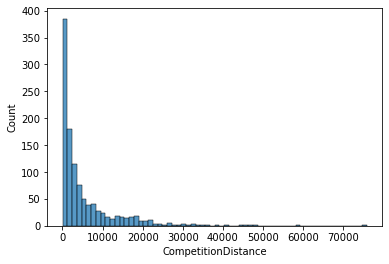

In [33]:
sns.histplot(store_data.CompetitionDistance.dropna())

In [34]:
store_data.CompetitionDistance.fillna(store_data.CompetitionDistance.median(), inplace=True)

In [35]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [36]:
#stores had no competition. fill the missing values with zeros.
store_data["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store_data["CompetitionOpenSinceYear"].fillna(0, inplace = True)

In [37]:
store_data.groupby(by = "Promo2", axis = 0).count() 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,,,,,,,
0,544,544,544,544,544,544,0,0,0
1,571,571,571,571,571,571,571,571,571


In [38]:
# replace the NaN from Promo since Week and Year with zero
store_data = store_data.drop([
    'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval'], axis=1)

store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 61.1+ KB


In [39]:
store_data['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [40]:
store_data['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

# Merging the dataframes

In [41]:
data = pd.merge(train_data, store_data, how='left', on='Store')

In [42]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,a,a,29910.0,4.0,2015.0,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  StoreType                  1017209 no

In [44]:
data.isnull().sum()
data.duplicated().sum()

0

# Data visualization

In [45]:
data['Year'].unique()

array([2015, 2014, 2013], dtype=int64)

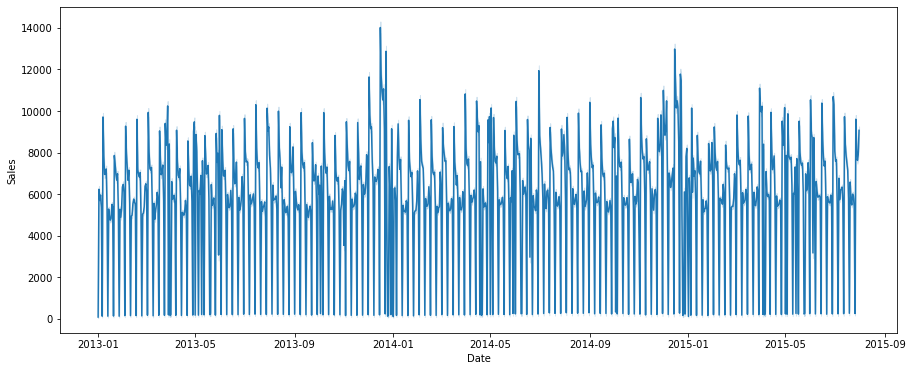

In [46]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Sales',data=data)
plt.show()

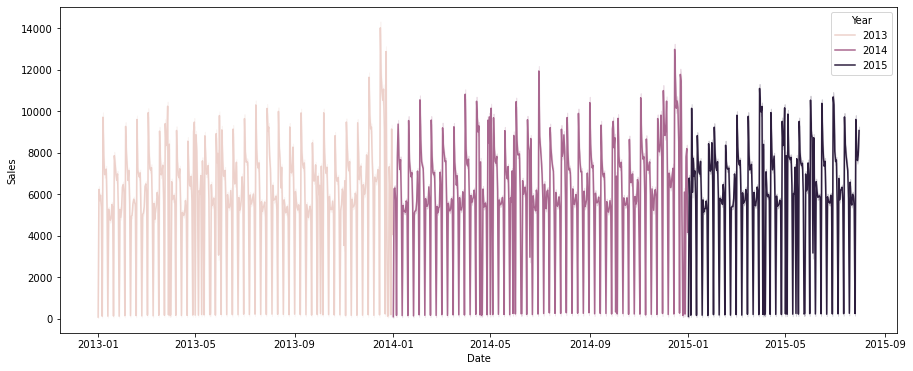

In [47]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Date',y='Sales',data=data,hue='Year')
plt.show()

In [48]:
data_year = data[['Sales','Year']].groupby(by='Year').sum().reset_index()
data_year

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


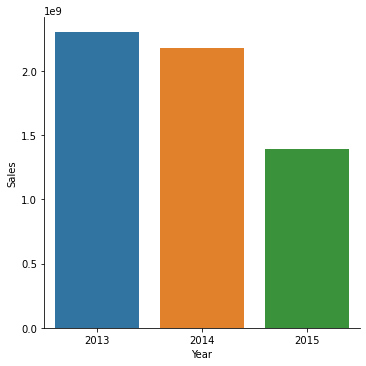

In [49]:
sns.catplot(x='Year',y='Sales',data=data_year,kind='bar')

In [50]:
data_month = data[['Sales','Month']].groupby(by='Month').sum().reset_index()
data_month

,Month,Sales
0,1,566728724
1,2,528734410
2,3,599831906
3,4,575895295
4,5,569248217
5,6,578112775
6,7,595059205
7,8,361791202
8,9,342570131
9,10,351878728


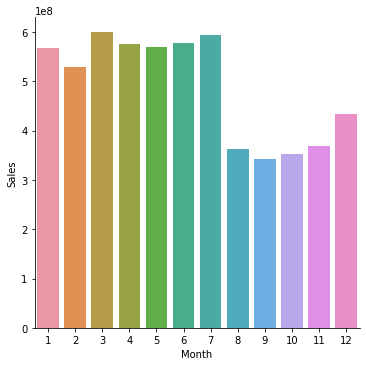

In [51]:
sns.catplot(x='Month',y='Sales',data=data_month,kind='bar')

<AxesSubplot:xlabel='Customers', ylabel='Sales'>

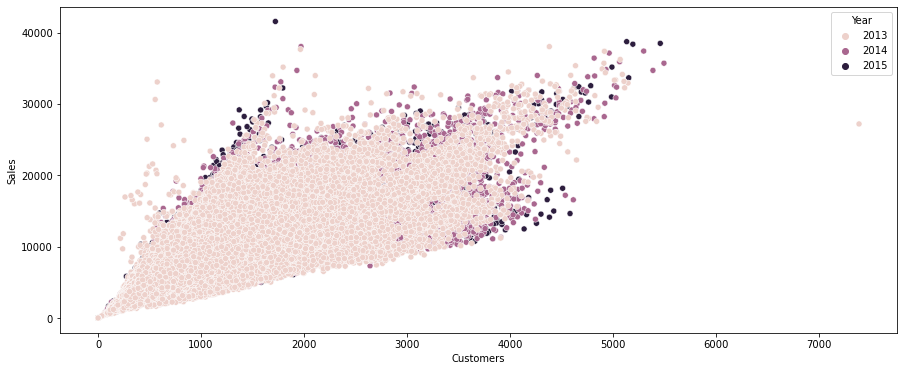

In [52]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='Customers', y='Sales', hue='Year')

<AxesSubplot:xlabel='DayOfWeek', ylabel='Customers'>

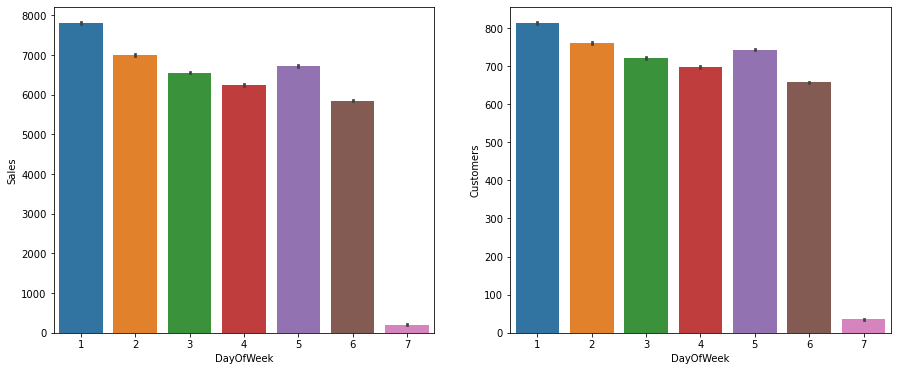

In [53]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))

sns.barplot(x='DayOfWeek', y='Sales', data=data, ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=data, ax=axis2)

<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

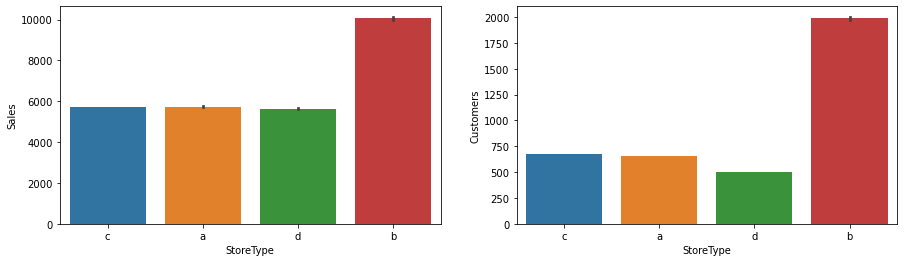

In [54]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=data['StoreType'],y=data['Sales'], ax=axis1)
sns.barplot(x=data['StoreType'],y=data['Customers'], ax=axis2)

<AxesSubplot:xlabel='StateHoliday', ylabel='Customers'>

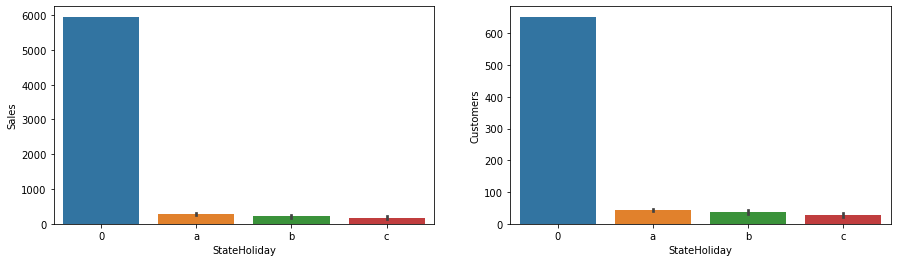

In [55]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=data['StateHoliday'],y=data['Sales'], ax=axis1)
sns.barplot(x=data['StateHoliday'],y=data['Customers'], ax=axis2)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Customers'>

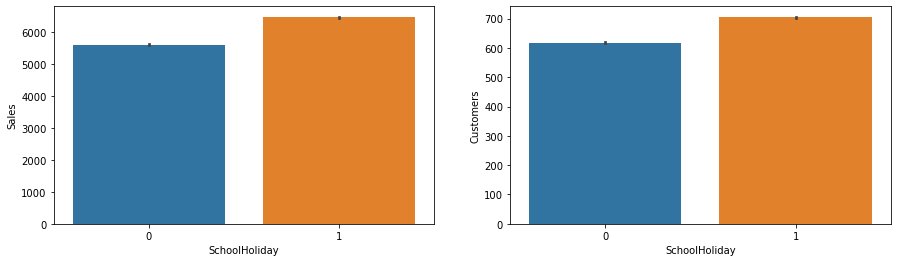

In [56]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=data['SchoolHoliday'],y=data['Sales'], ax=axis1)
sns.barplot(x=data['SchoolHoliday'],y=data['Customers'], ax=axis2)

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

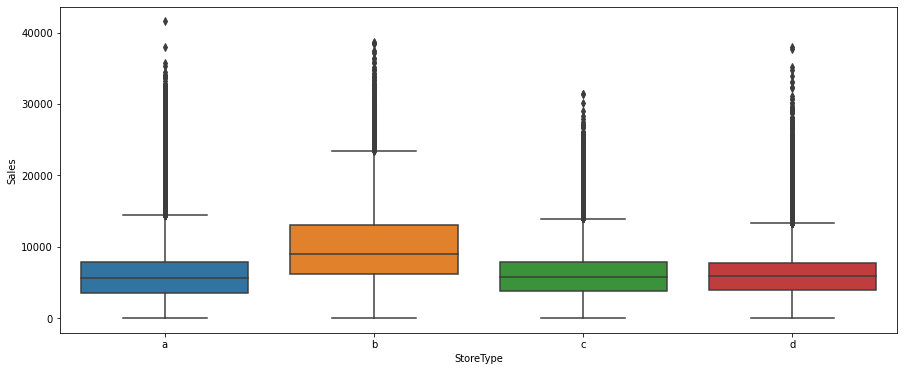

In [57]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='StoreType', y='Sales', order=['a','b','c','d'])

<AxesSubplot:xlabel='StoreType', ylabel='Customers'>

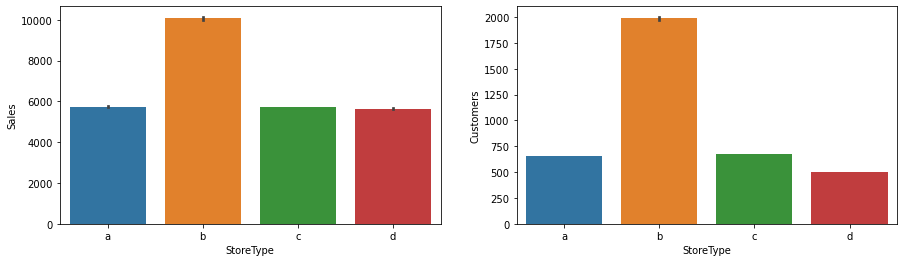

In [58]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=data['StoreType'],y=data['Sales'], ax=axis1, order=['a','b','c','d'])
sns.barplot(x=data['StoreType'],y=data['Customers'], ax=axis2, order=['a','b','c','d'])

<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

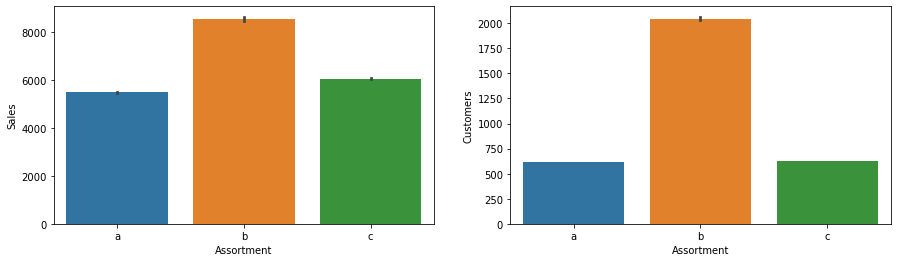

In [59]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=data['Assortment'],y=data['Sales'], ax=axis1, order=['a','b','c'])
sns.barplot(x=data['Assortment'],y=data['Customers'], ax=axis2, order=['a','b','c'])

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

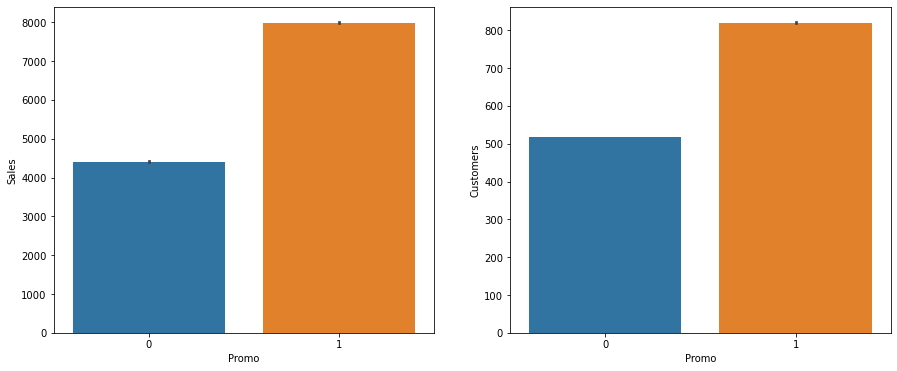

In [60]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x='Promo', y='Sales', data=data, ax=axis1)
sns.barplot(x='Promo', y='Customers', data=data, ax=axis2)

C:\Users\pragy\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


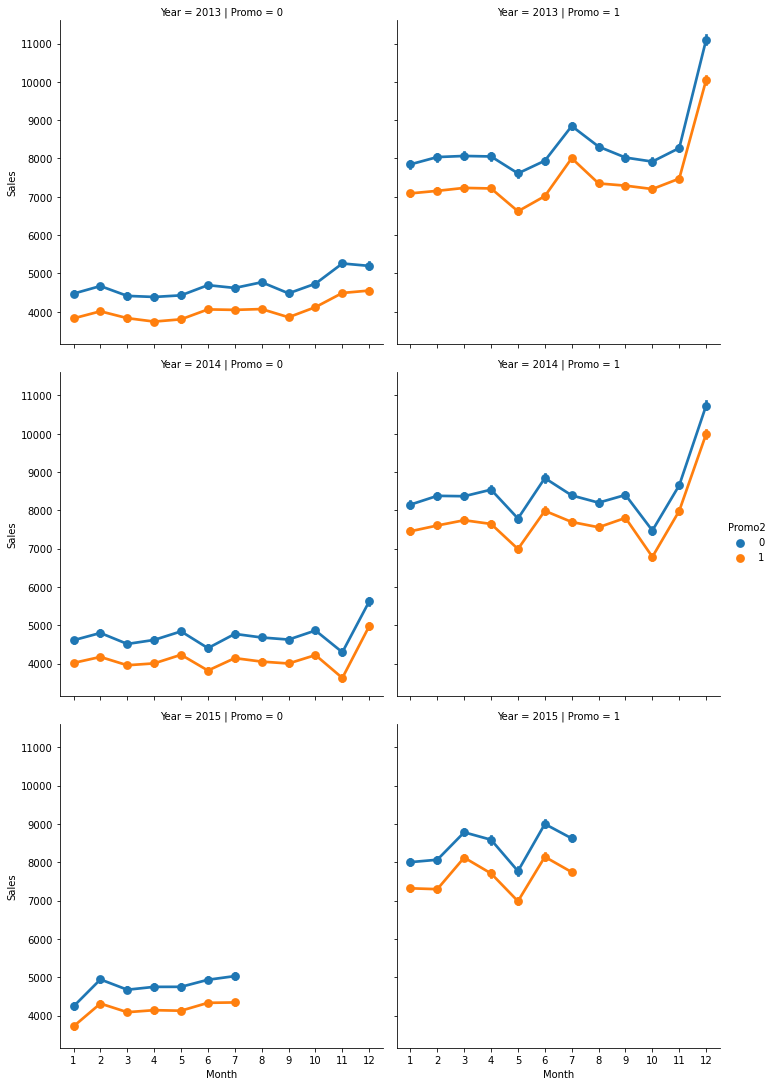

In [61]:
sns.factorplot(data = data, x ="Month", y = "Sales", 
               col = 'Promo', 
               hue = 'Promo2',
               row = "Year"
             )

C:\Users\pragy\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


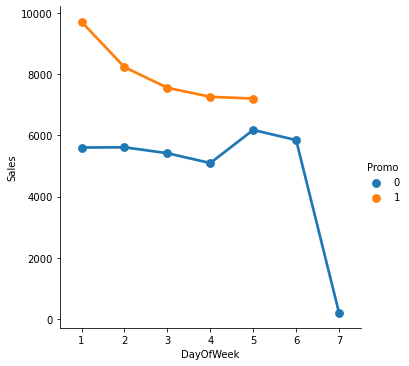

In [62]:
sns.factorplot(data = data, x = "DayOfWeek", y = "Sales", hue = "Promo")

Text(0, 0.5, ' Max Customer Number')

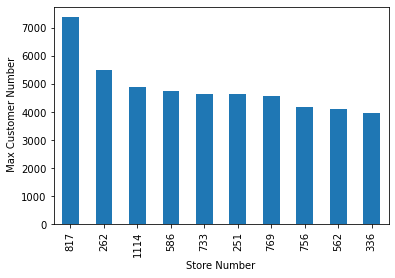

In [63]:
data.groupby('Store').agg({'Customers': 'max'})['Customers'].nlargest(10).plot.bar()
plt.xlabel('Store Number')
plt.ylabel(' Max Customer Number')


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

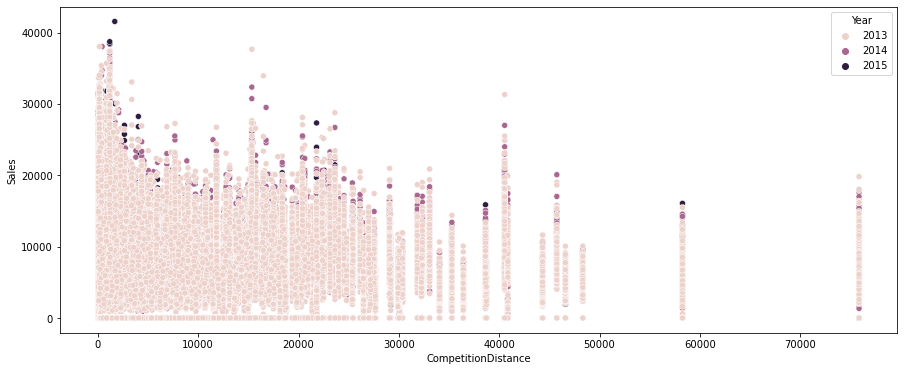

In [64]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='CompetitionDistance', y='Sales', hue='Year')

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Customers'>

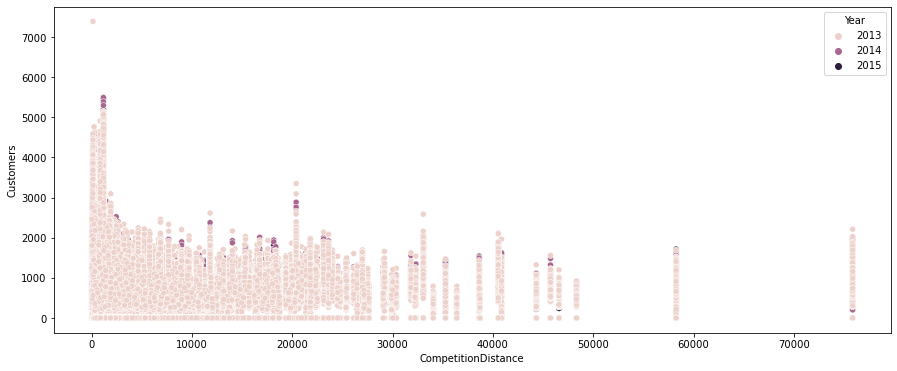

In [65]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=data, x='CompetitionDistance', y='Customers', hue='Year')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  StoreType                  1017209 no

In [67]:
data["CompetitionOpenSince"] = np.where((data["CompetitionOpenSinceMonth"] == 0) & (data["CompetitionOpenSinceYear"] == 0), 
                                                0,(data.Month - data.CompetitionOpenSinceMonth) + (12 *(data.Year - data.CompetitionOpenSinceYear)))

#drop the variables
data = data.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [68]:
data['StateHoliday'].replace({'0' : 0 , 'a': 1 , 'b' : 1, 'c' : 1}, inplace=True)

In [69]:
data['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [70]:
data['Assortment'].replace({'a':"basic", 'b':"extra", 'c':"extended"},inplace=True)

In [71]:
data['Assortment'].value_counts()

basic       537445
extended    471470
extra         8294
Name: Assortment, dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   DayOfWeek             1017209 non-null  int64         
 2   Date                  1017209 non-null  datetime64[ns]
 3   Sales                 1017209 non-null  int64         
 4   Customers             1017209 non-null  int64         
 5   Open                  1017209 non-null  int64         
 6   Promo                 1017209 non-null  int64         
 7   StateHoliday          1017209 non-null  int64         
 8   SchoolHoliday         1017209 non-null  int64         
 9   Year                  1017209 non-null  int64         
 10  Month                 1017209 non-null  int64         
 11  StoreType             1017209 non-null  object        
 12  Assortment            1017209 non-null  ob

In [73]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2,CompetitionOpenSince
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,c,basic,1270.0,0,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,a,basic,570.0,1,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,a,basic,14130.0,1,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,c,extended,620.0,0,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,a,basic,29910.0,0,3.0


In [74]:
data['Date'] = data['Date'].apply(lambda x: x.value)

In [75]:
Store_type = pd.get_dummies(data['StoreType'])

In [76]:
Assort = pd.get_dummies(data['Assortment'])


In [77]:
data = data.drop(["StoreType","Assortment"], axis = 1) 

In [78]:
data = pd.concat([data, Store_type, Assort], axis=1)
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionDistance,Promo2,CompetitionOpenSince,a,b,c,d,basic,extended,extra
0,1,5,1438300800000000000,5263,555,1,1,0,1,2015,...,1270.0,0,82.0,0,0,1,0,1,0,0
1,2,5,1438300800000000000,6064,625,1,1,0,1,2015,...,570.0,1,92.0,1,0,0,0,1,0,0
2,3,5,1438300800000000000,8314,821,1,1,0,1,2015,...,14130.0,1,103.0,1,0,0,0,1,0,0
3,4,5,1438300800000000000,13995,1498,1,1,0,1,2015,...,620.0,0,70.0,0,0,1,0,0,1,0
4,5,5,1438300800000000000,4822,559,1,1,0,1,2015,...,29910.0,0,3.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,1356998400000000000,0,0,0,0,1,1,2013,...,1900.0,1,-17.0,1,0,0,0,1,0,0
1017205,1112,2,1356998400000000000,0,0,0,0,1,1,2013,...,1880.0,0,81.0,0,0,1,0,0,1,0
1017206,1113,2,1356998400000000000,0,0,0,0,1,1,2013,...,9260.0,0,0.0,1,0,0,0,0,1,0
1017207,1114,2,1356998400000000000,0,0,0,0,1,1,2013,...,870.0,0,0.0,1,0,0,0,0,1,0


In [79]:
x = data.drop(columns='Sales', axis=1)
x

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,CompetitionDistance,Promo2,CompetitionOpenSince,a,b,c,d,basic,extended,extra
0,1,5,1438300800000000000,555,1,1,0,1,2015,7,1270.0,0,82.0,0,0,1,0,1,0,0
1,2,5,1438300800000000000,625,1,1,0,1,2015,7,570.0,1,92.0,1,0,0,0,1,0,0
2,3,5,1438300800000000000,821,1,1,0,1,2015,7,14130.0,1,103.0,1,0,0,0,1,0,0
3,4,5,1438300800000000000,1498,1,1,0,1,2015,7,620.0,0,70.0,0,0,1,0,0,1,0
4,5,5,1438300800000000000,559,1,1,0,1,2015,7,29910.0,0,3.0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,1356998400000000000,0,0,0,1,1,2013,1,1900.0,1,-17.0,1,0,0,0,1,0,0
1017205,1112,2,1356998400000000000,0,0,0,1,1,2013,1,1880.0,0,81.0,0,0,1,0,0,1,0
1017206,1113,2,1356998400000000000,0,0,0,1,1,2013,1,9260.0,0,0.0,1,0,0,0,0,1,0
1017207,1114,2,1356998400000000000,0,0,0,1,1,2013,1,870.0,0,0.0,1,0,0,0,0,1,0


In [80]:
y = data['Sales']
y

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1017204        0
1017205        0
1017206        0
1017207        0
1017208        0
Name: Sales, Length: 1017209, dtype: int64

# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [82]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [83]:
model= LinearRegression()
model = model.fit(x_train, y_train)

In [84]:
pred = model.predict(x_test)

In [85]:
mse = mean_squared_error(y_test, pred)
print(mse)

2847072.872523209


In [86]:
rmse = np.sqrt(mse)
print("rmse=", rmse)

rmse= 1687.3271385606317


In [87]:
r2 = r2_score(y_test, pred)
print("R square=", r2)

R square= 0.8073273561164827


# Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

rand_model = RandomForestRegressor(n_estimators=10)
rand_model.fit(x_train, y_train)
rand_pred = rand_model.predict(x_test)

In [89]:
mse = mean_squared_error(y_test, rand_pred)
print(mse)

227970.19465926403


In [90]:
rmse = np.sqrt(mse)
print("rmse=", rmse)

rmse= 477.4622442238381


In [91]:
r2 = r2_score(y_test, rand_pred)
print("R square=", r2)

R square= 0.9845723583138519


In [92]:
x_test.head(5)

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,CompetitionDistance,Promo2,CompetitionOpenSince,a,b,c,d,basic,extended,extra
982497,968,5,1359676800000000000,955,1,0,0,0,2013,2,1190.0,0,0.0,0,0,1,0,1,0,0
719065,676,3,1380067200000000000,1563,1,1,0,0,2013,9,1410.0,0,60.0,0,1,0,0,0,0,1
145542,593,1,1427068800000000000,1107,1,0,0,0,2015,3,33060.0,0,60.0,1,0,0,0,0,1,0
252177,999,1,1418601600000000000,1136,1,1,0,0,2014,12,15140.0,1,154.0,0,0,0,1,0,1,0
479489,825,1,1398643200000000000,606,1,1,0,0,2014,4,380.0,1,35.0,1,0,0,0,1,0,0


In [93]:
x_test.columns

Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'CompetitionDistance',
       'Promo2', 'CompetitionOpenSince', 'a', 'b', 'c', 'd', 'basic',
       'extended', 'extra'],
      dtype='object')

In [94]:
# initialize list of lists
test = [[405,3,735343,644,1,1,0,0,2020,9,456,0,21,0,0,0,1,0,0,1],]
  
# Create the pandas DataFrame
df = pd.DataFrame(test, columns=['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'CompetitionDistance', 'Promo2',
       'CompetitionOpenSince', 'a', 'b', 'c', 'd', 'basic', 'extended',
       'extra'])
  
# print dataframe.
df

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,CompetitionDistance,Promo2,CompetitionOpenSince,a,b,c,d,basic,extended,extra
0,405,3,735343,644,1,1,0,0,2020,9,456,0,21,0,0,0,1,0,0,1


In [95]:
model.predict(df)

array([-1238.45895191])

In [96]:
rand_model.predict(df)

array([6156.1])